In [1]:
# Import our dependencies
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import os
from pathlib import Path
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
#Import data -Add csv names
movie_file_path =('movies_dataset/clean.csv')
merg_df = pd.read_csv(movie_file_path, index_col=0)


In [3]:
# drop extra columns

In [4]:
merg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 427 entries, 0 to 426
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   genre      427 non-null    object 
 1   score      427 non-null    float64
 2   votes      427 non-null    float64
 3   movie_tag  427 non-null    object 
 4   fan_fic    427 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 20.0+ KB


In [5]:
# Drop the null columns where all values are null
merg_df = merg_df.dropna(axis='columns', how='all')

# Drop the null rows
merg_df = merg_df.dropna()

In [6]:
merg_df.drop(columns=["movie_tag"], inplace=True)

In [7]:
y= merg_df["fan_fic"]
merg_df.drop("fan_fic", axis=1, inplace=True)

In [8]:
merg_df["genre"]=merg_df["genre"].astype("category")
merg_df.dtypes

genre    category
score     float64
votes     float64
dtype: object

In [9]:
merg_df["genre"]=merg_df["genre"].cat.codes
merg_df.head()

,genre,score,votes
0,0,8.8,2100000.0
1,10,8.2,1200000.0
2,0,7.5,394000.0
3,6,8.0,716000.0
4,5,7.5,363000.0


In [10]:
X = merg_df.copy()

In [11]:
# Split and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:

model = LinearRegression()

In [13]:
model.fit(X_train, y_train)

LinearRegression()

In [14]:
print(model.score(X_test,y_test))

0.0374529029884213


In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [17]:
print(model.score(X_test_scaled,y_test))

0.037452902991575665


In [18]:
y_pred=model.predict(X_test)

C:\Users\Court\anaconda3\envs\mlenv\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


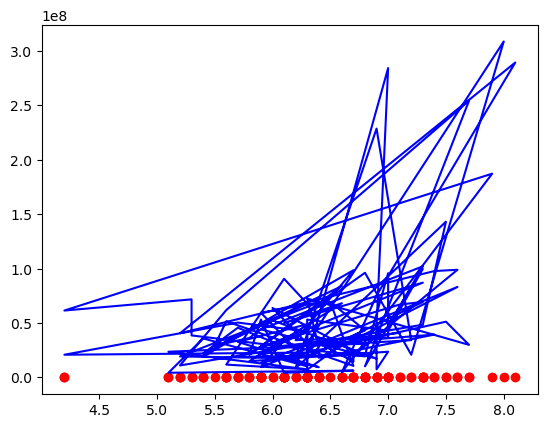

In [19]:
plt.scatter(X_test["score"],y_test, color="r")
plt.plot(X_test["score"],y_pred, color="b")
plt.show()

In [20]:
y_pred = model.predict(X)
print(y_pred.shape)

(427,)


C:\Users\Court\anaconda3\envs\mlenv\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [21]:
print(model.coef_)
print(model.intercept_)

[-93.10772312 -53.34783869 394.3961659 ]
164.57187499999995


In [22]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred)

NameError: name 'confusion_matrix' is not defined

plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()